Inspired by Alex Sington on Youtube \
https://www.youtube.com/watch?v=aprt035um3o

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

data = pd.read_excel('nba_player_data.xlsx')

In [ ]:
data.shape

(8261, 30)

In [ ]:
data.drop(columns=["RANK","EFF"], inplace=True)

In [ ]:
data['Season_start_year'] = data['Year'].str[:4].astype(int)
data['Season_end_year'] = data['Year'].str[:4].astype(int) + 1

In [ ]:
data.TEAM.nunique()
data.head()

,Year,Season_Type,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,Season_start_year,Season_end_year
0,2014-15,Regular%20Season,201935,James Harden,1610612745,HOU,81,2981,647,1470,0.440,208,555,0.375,715,824,0.868,75,384,459,565,154,60,321,208,2217,1.76,0.48,2014,2015
1,2014-15,Regular%20Season,201939,Stephen Curry,1610612744,GSW,80,2613,653,1341,0.487,286,646,0.443,308,337,0.914,56,285,341,619,163,16,249,158,1900,2.49,0.66,2014,2015
2,2014-15,Regular%20Season,201566,Russell Westbrook,1610612760,OKC,67,2302,627,1471,0.426,86,288,0.299,546,654,0.835,124,364,488,574,140,14,293,184,1886,1.96,0.48,2014,2015
3,2014-15,Regular%20Season,2544,LeBron James,1610612739,CLE,69,2493,624,1279,0.488,120,339,0.354,375,528,0.710,51,365,416,511,109,49,272,135,1743,1.88,0.40,2014,2015
4,2014-15,Regular%20Season,203081,Damian Lillard,1610612757,POR,82,2925,590,1360,0.434,196,572,0.343,344,398,0.864,49,329,378,507,97,21,222,164,1720,2.28,0.44,2014,2015


In [ ]:
data['Season_Type'] = data['Season_Type'].replace('Regular%20Season', 'Regular Season')

In [ ]:
data.columns

Index(['Year', 'Season_Type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'Season_start_year', 'Season_end_year'],
      dtype='object')

In [ ]:
rs_df = data[data['Season_Type'] == 'Regular Season']
po_df = data[data['Season_Type'] == 'Playoffs']
col_for_ana = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']

# Stats Correlation

In [ ]:
data_per_min = data.groupby(['PLAYER','PLAYER_ID','Year'])[col_for_ana].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col] / data_per_min['MIN']

data_per_min['FG%'] = data_per_min['FGM'] / data_per_min['FGA']
data_per_min['3P%'] = data_per_min['FG3M'] / data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM'] / data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A'] / data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS'] / data_per_min['FGA']
data_per_min['FG3M/FGA'] = data_per_min['FG3M'] / data_per_min['FGA']
data_per_min['FTA/FGA'] = data_per_min['FTA'] / data_per_min['FGA']
data_per_min['OREB%'] = data_per_min['OREB'] / (data_per_min['OREB'] + data_per_min['DREB'])
data_per_min['AST_TOV'] = data_per_min['AST'] / data_per_min['TOV']
data_per_min['TS%'] = data_per_min['PTS'] / (2 * (data_per_min['FGA'] + 0.44 * data_per_min['FTA']))

data_per_min = data_per_min[data_per_min['MIN'] >= 60]#around 90% by (data_per_min['MIN'] >= 60).mean()
data_per_min.drop(columns=['PLAYER_ID'], inplace=True)
data_per_min.select_dtypes(include='number').corr()

,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FTA/FGA,OREB%,AST_TOV,TS%
MIN,1.000000,0.435938,0.360198,0.201741,0.122882,0.345420,0.280197,-0.131936,0.047491,-0.024890,0.247215,0.021522,-0.061226,0.151813,-0.363630,0.462665,0.193312,0.191468,0.252424,-0.021373,0.283276,0.079126,0.054283,-0.201915,0.055747,0.324356
FGM,0.435938,1.000000,0.872282,0.194117,0.141354,0.647364,0.614263,0.076049,0.241248,0.192365,0.255645,-0.040757,0.075360,0.446278,-0.179622,0.959909,0.392806,0.125054,0.197219,-0.262494,0.386969,-0.158629,0.133096,-0.072931,-0.113156,0.410916
FGA,0.360198,0.872282,1.000000,0.433416,0.454377,0.589818,0.511951,-0.223275,-0.005114,-0.098772,0.354720,0.011136,-0.165235,0.468610,-0.314184,0.902749,-0.082876,0.175021,0.300634,0.026359,-0.010319,0.054049,-0.063816,-0.282780,-0.011204,0.020634
FG3M,0.201741,0.194117,0.433416,1.000000,0.957801,-0.010098,-0.146747,-0.609832,-0.400966,-0.526242,0.139316,-0.018759,-0.428410,-0.050709,-0.401969,0.358480,-0.391184,0.577647,0.402222,0.826324,-0.096183,0.887274,-0.441087,-0.518836,0.187098,0.090423
FG3A,0.122882,0.141354,0.454377,0.957801,1.000000,-0.019553,-0.155025,-0.641715,-0.431465,-0.560074,0.155272,0.001234,-0.451603,-0.027780,-0.401239,0.308005,-0.529351,0.452096,0.385608,0.866333,-0.252684,0.836541,-0.466668,-0.529823,0.196858,-0.091075
FTM,0.345420,0.647364,0.589818,-0.010098,-0.019553,1.000000,0.957319,0.089116,0.209651,0.177007,0.271701,0.015396,0.072855,0.483375,-0.083284,0.760959,0.202849,0.004440,0.269845,-0.303557,0.475312,-0.263728,0.656532,-0.022436,-0.118681,0.284578
FTA,0.280197,0.614263,0.511951,-0.146747,-0.155025,0.957319,1.000000,0.230589,0.307570,0.302336,0.204598,0.014302,0.176568,0.482771,0.015966,0.694334,0.284413,-0.087446,0.033485,-0.422363,0.499529,-0.384525,0.773031,0.086819,-0.184816,0.262176
OREB,-0.131936,0.076049,-0.223275,-0.609832,-0.641715,0.089116,0.230589,1.000000,0.668160,0.869992,-0.353134,-0.099959,0.596100,-0.012380,0.483211,-0.052797,0.577556,-0.408394,-0.372724,-0.640790,0.378268,-0.607319,0.437912,0.799028,-0.365091,0.254670
DREB,0.047491,0.241248,-0.005114,-0.400966,-0.431465,0.209651,0.307570,0.668160,1.000000,0.948144,-0.199055,-0.122512,0.534991,0.141198,0.324545,0.148643,0.487122,-0.250154,-0.243012,-0.488637,0.358037,-0.447251,0.352321,0.199677,-0.325278,0.269816
REB,-0.024890,0.192365,-0.098772,-0.526242,-0.560074,0.177007,0.302336,0.869992,0.948144,1.000000,-0.282773,-0.123892,0.609195,0.088285,0.421505,0.075952,0.569550,-0.338910,-0.320150,-0.597567,0.398869,-0.555842,0.420560,0.473669,-0.371178,0.287603


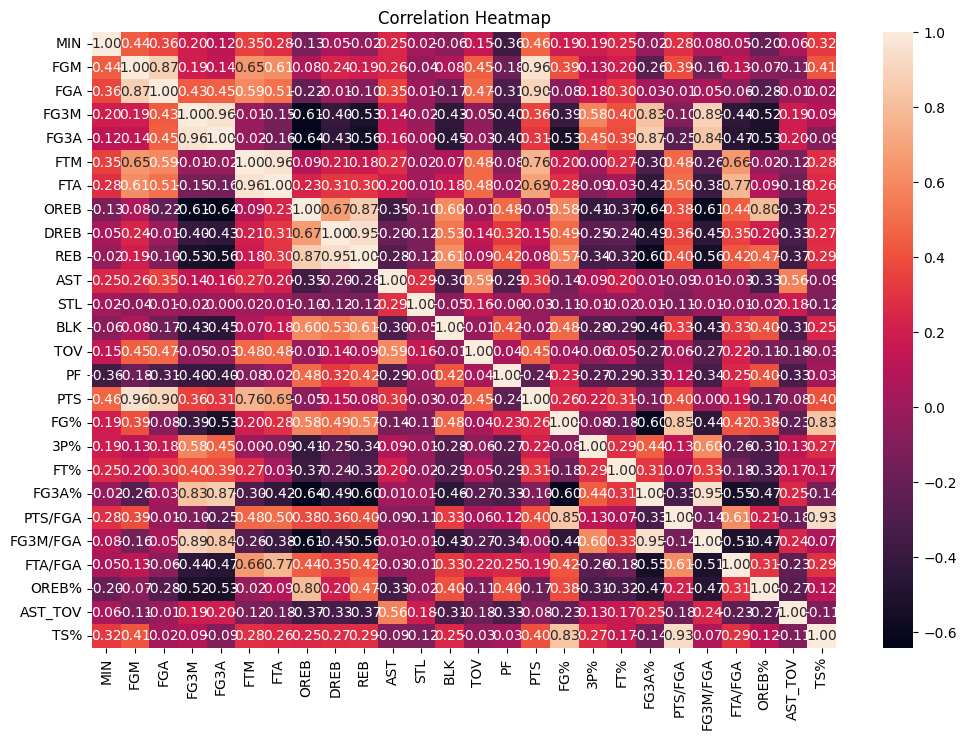

In [ ]:
corr = data_per_min.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))  # optional: set figure size
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Minutes distribution

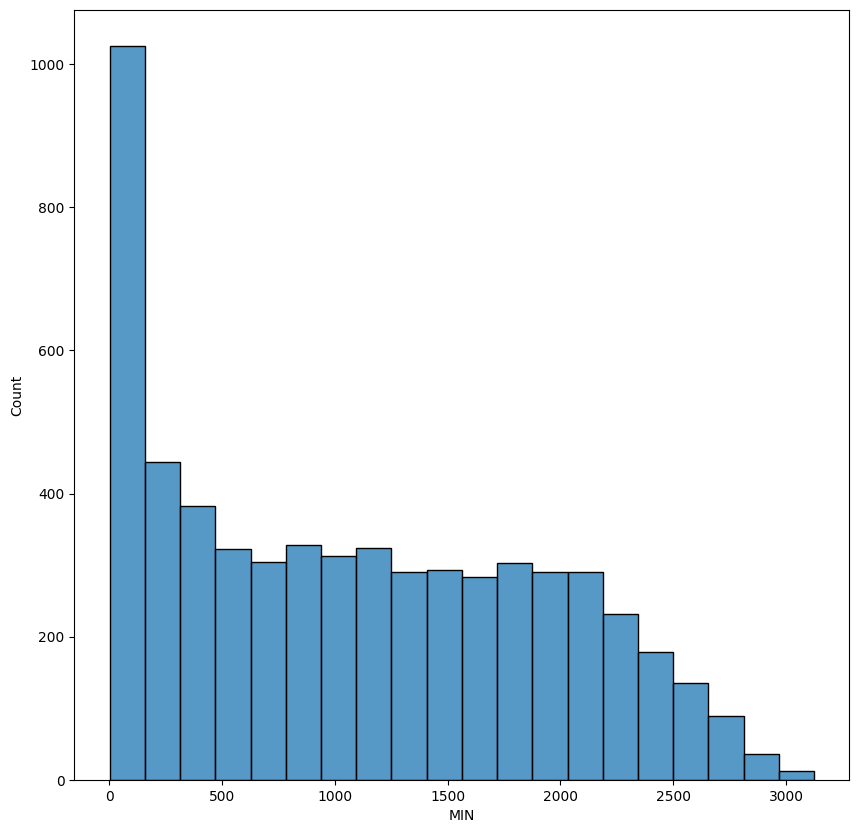

In [ ]:
plt.figure(figsize=(10,10))

sns.histplot(x=rs_df['MIN'])
plt.show()

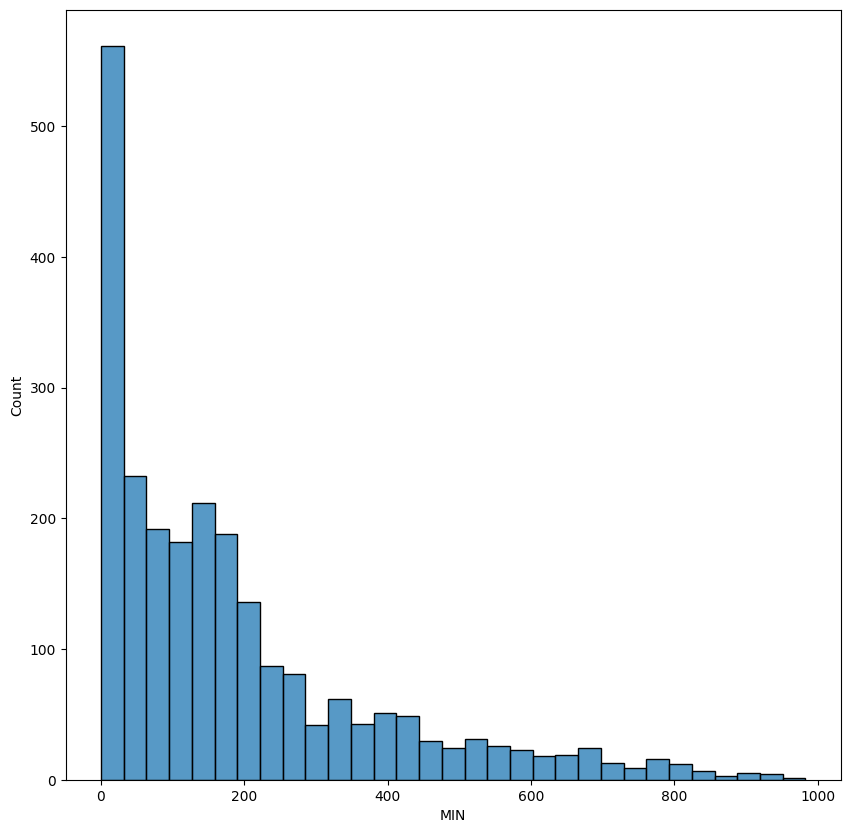

In [ ]:
plt.figure(figsize=(10,10))

sns.histplot(x=po_df['MIN'])
plt.show()

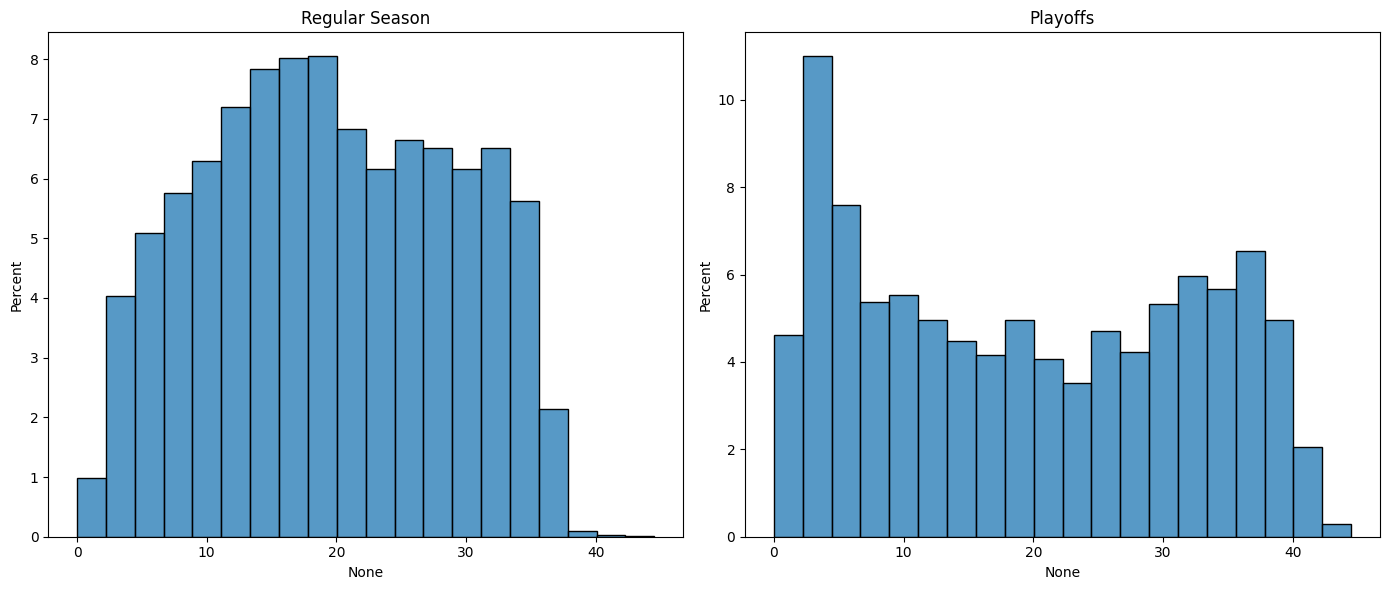

In [ ]:
min_val = min((rs_df['MIN'] / rs_df['GP']).min(), (po_df['MIN'] / po_df['GP']).min())
max_val = max((rs_df['MIN'] / rs_df['GP']).max(), (po_df['MIN'] / po_df['GP']).max())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(x=rs_df['MIN'] / rs_df['GP'],
             stat='percent', kde=False, bins=20, binrange=(min_val, max_val), ax=axes[0])
axes[0].set_title('Regular Season')

sns.histplot(x=po_df['MIN'] / po_df['GP'],
             stat='percent', kde=False, bins=20, binrange=(min_val, max_val), ax=axes[1])
axes[1].set_title('Playoffs')

plt.tight_layout()
plt.show()

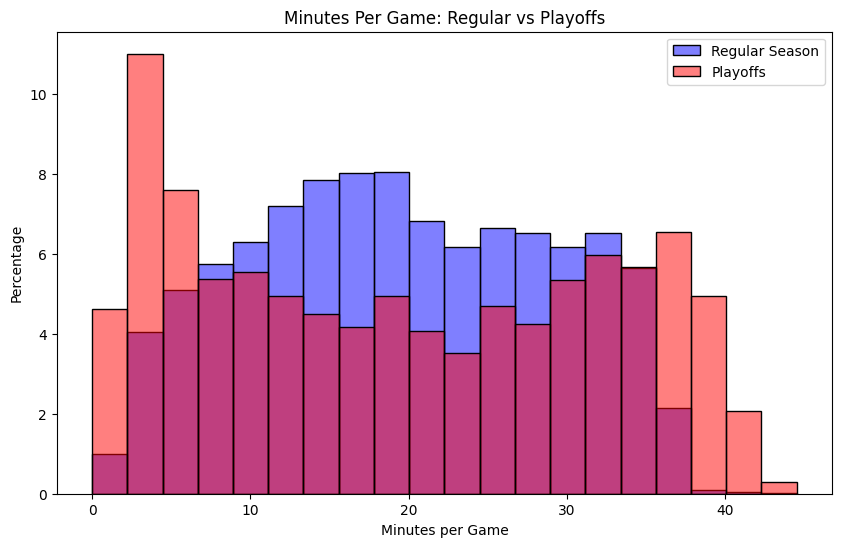

In [ ]:
# Plot both on the same graph
plt.figure(figsize=(10, 6))

sns.histplot(x=rs_df['MIN'] / rs_df['GP'],
             stat='percent', bins=20, binrange=(min_val, max_val),
             color='blue', label='Regular Season', alpha=0.5)

sns.histplot(x=po_df['MIN'] / po_df['GP'],
             stat='percent', bins=20, binrange=(min_val, max_val),
             color='red', label='Playoffs', alpha=0.5)

plt.title('Minutes Per Game: Regular vs Playoffs')
plt.xlabel('Minutes per Game')
plt.ylabel('Percentage')
plt.legend()
plt.show()


#How games has changed over the past 10 years

In [ ]:
new_df = data.groupby(['Season_start_year'])[col_for_ana].sum().reset_index()
new_df['Poss_estimation'] = new_df['FGA'] + 0.44 * new_df['FTA'] + new_df['TOV'] - new_df['OREB']
new_df = new_df[list(new_df.columns[0:2])+ ['Poss_estimation'] + list(new_df.columns[2:-1])]

new_df['FG%'] = new_df['FGM'] / new_df['FGA']
new_df['3P%'] = new_df['FG3M'] / new_df['FG3A']
new_df['FT%'] = new_df['FTM'] / new_df['FTA']
new_df['FG3A%'] = new_df['FG3A'] / new_df['FGA']
new_df['PTS/FGA'] = new_df['PTS'] / new_df['FGA']
new_df['FG3M/FGA'] = new_df['FG3M'] / new_df['FGA']
new_df['FTA/FGA'] = new_df['FTA'] / new_df['FGA']
new_df['OREB%'] = new_df['OREB'] / (new_df['OREB'] + new_df['DREB'])
new_df['AST_TOV'] = new_df['AST'] / new_df['TOV']
new_df['TS%'] = new_df['PTS'] / (2 * (new_df['FGA'] + 0.44 * new_df['FTA']))

new_df

,Season_start_year,MIN,Poss_estimation,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FTA/FGA,OREB%,AST_TOV,TS%
0,2014,634546,253004.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.270340,1.196379,0.094516,0.274773,0.251026,1.612666,0.533669
1,2015,636391,258064.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.286372,1.213174,0.101302,0.276688,0.238410,1.614585,0.540754
2,2016,632482,258443.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.317992,1.238097,0.113767,0.271433,0.232922,1.694798,0.553003
3,2017,633425,260904.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.338081,1.235834,0.122072,0.252781,0.222634,1.701611,0.556069
4,2018,634231,268739.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.360021,1.246105,0.127577,0.260191,0.228951,1.815477,0.559050
5,2019,552262,234384.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.387092,1.260861,0.138619,0.261622,0.223286,1.749882,0.565351
6,2020,562518,235759.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.391988,1.267878,0.143613,0.247465,0.222356,1.877818,0.571691
7,2021,635572,264004.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.400150,1.256463,0.141522,0.249506,0.231899,1.879960,0.566085
8,2022,635386,266600.04,110010,231870,32382,89926,48136,61516,27403,86695,114098,66265,19078,12250,35066,52438,300538,0.474447,0.360096,0.782496,0.387829,1.296149,0.139656,0.265304,0.240171,1.889722,0.580330
9,2023,633272,263500.48,110138,232542,33501,91831,44504,56767,27618,86355,113973,69408,19438,13434,33599,49201,298281,0.473626,0.364811,0.783977,0.394901,1.282697,0.144064,0.244115,0.242321,2.065776,0.579143


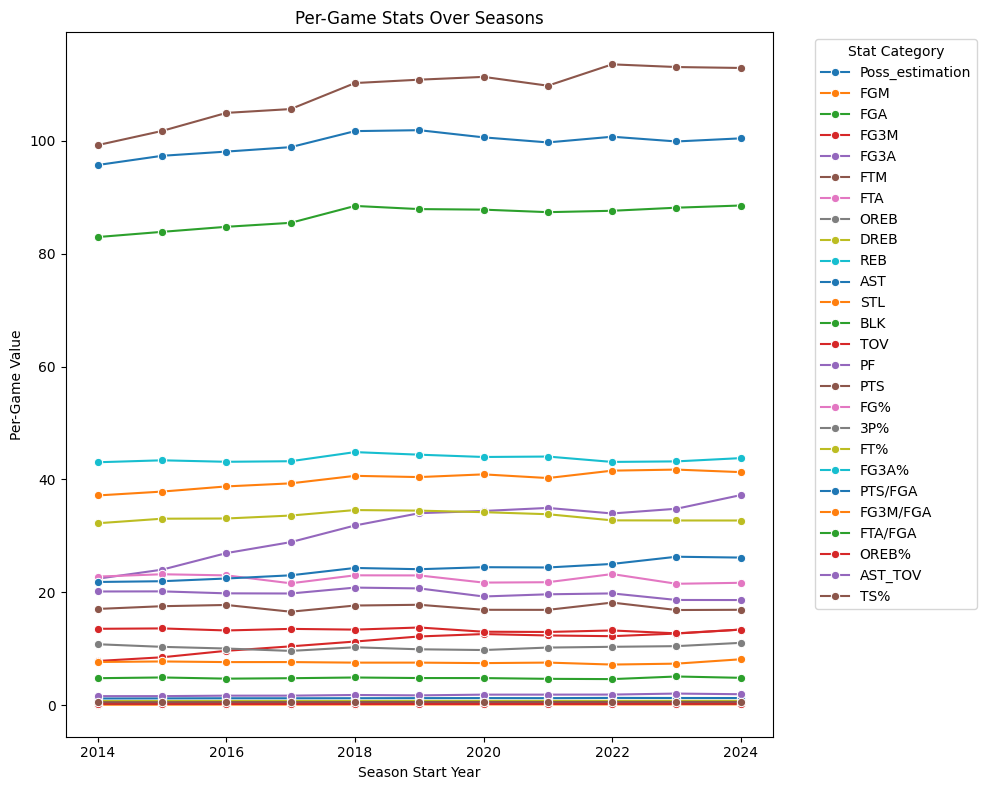

In [ ]:
new_df_per_game = new_df.copy()
for col in new_df_per_game.columns[2:18]:
  new_df_per_game[col] = (new_df_per_game[col]/new_df_per_game['MIN'])*48*5

new_df_per_game.drop(columns=['MIN'], inplace=True)

plt.figure(figsize=(10,8))
for col in new_df_per_game.columns[1:]:
    sns.lineplot(
        x=new_df_per_game['Season_start_year'],
        y=new_df_per_game[col],
        marker='o',       # Keep point markers
        label=col         # This adds the line to the legend
    )

plt.title("Per-Game Stats Over Seasons")
plt.xlabel("Season Start Year")
plt.ylabel("Per-Game Value")
plt.legend(title='Stat Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


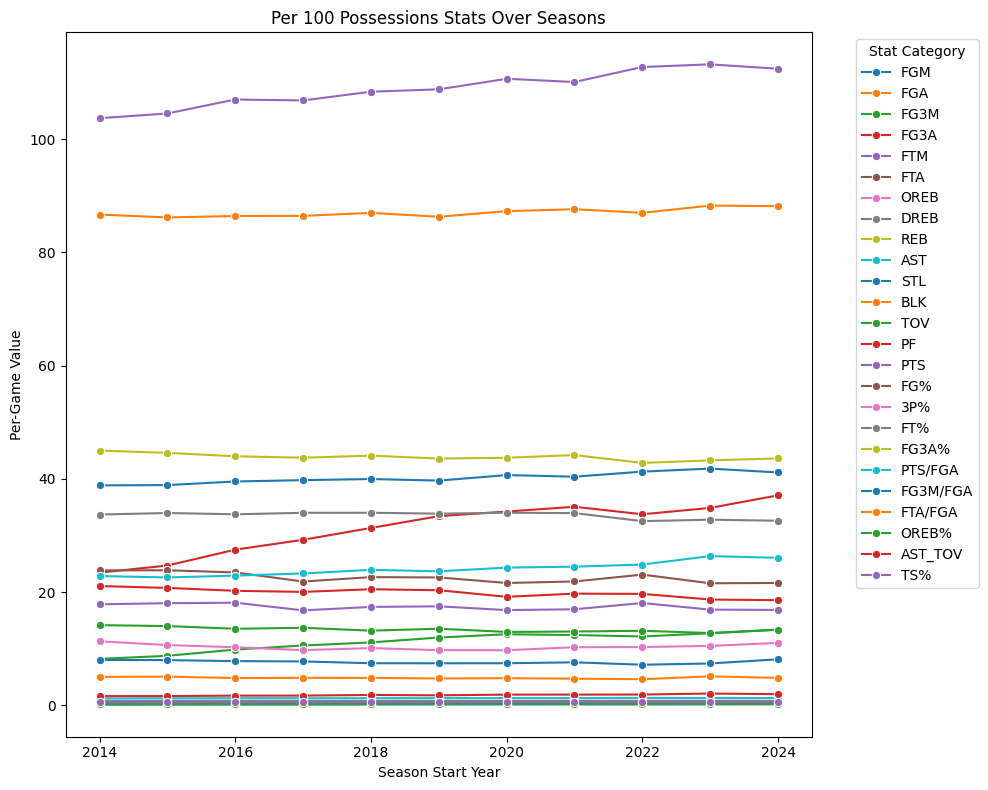

In [ ]:
new_df_per_100 = new_df.copy()
for col in new_df_per_100.columns[3:18]:
  new_df_per_100[col] = (new_df_per_100[col]/new_df_per_100['Poss_estimation'])*100

new_df_per_100.drop(columns=['MIN','Poss_estimation'], inplace=True)

plt.figure(figsize=(10,8))
for col in new_df_per_100.columns[1:]:
    sns.lineplot(
        x=new_df_per_100['Season_start_year'],
        y=new_df_per_100[col],
        marker='o',
        label=col
    )

plt.title("Per 100 Possessions Stats Over Seasons")
plt.xlabel("Season Start Year")
plt.ylabel("Per-Game Value")
plt.legend(title='Stat Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#Regular Seasons and Playoffs Comparison

In [ ]:
rs_comp_df = rs_df.groupby(['Season_start_year'])[col_for_ana].sum().reset_index()
po_comp_df = po_df.groupby(['Season_start_year'])[col_for_ana].sum().reset_index()

for i in [rs_comp_df, po_comp_df]:
  i['Poss_estimation'] = i['FGA'] + 0.44 * i['FTA'] + i['TOV'] - i['OREB']
  i['Poss_per48'] = (i['Poss_estimation']/i['MIN'])*48*5

  i['FG%'] = i['FGM'] / i['FGA']
  i['3P%'] = i['FG3M'] / i['FG3A']
  i['FT%'] = i['FTM'] / i['FTA']
  i['FG3A%'] = i['FG3A'] / i['FGA']
  i['PTS/FGA'] = i['PTS'] / i['FGA']
  i['FG3M/FGA'] = i['FG3M'] / i['FGA']
  i['FTA/FGA'] = i['FTA'] / i['FGA']
  i['OREB%'] = i['OREB'] / (i['OREB'] + i['DREB'])
  i['AST_TOV'] = i['AST'] / i['TOV']
  i['TS%'] = i['PTS'] / (2 * (i['FGA'] + 0.44 * i['FTA']))
  for col in col_for_ana:
    i[col] = 100*i[col]/i['Poss_estimation']

  i.drop(columns=['MIN','Poss_estimation'], inplace=True)

rs_comp_df

,Season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Poss_per48,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FTA/FGA,OREB%,AST_TOV,TS%
0,2014,38.900086,86.650240,8.135183,23.240912,17.771371,23.688136,11.288515,33.604208,44.892723,22.846798,8.021797,4.972578,14.215495,20.960953,103.706727,95.659492,0.448932,0.350037,0.750222,0.268215,1.196843,0.093885,0.273376,0.251455,1.607176,0.534169
1,2015,38.926558,86.096120,8.670900,24.515476,17.996886,23.782176,10.603882,33.942436,44.546317,22.690502,7.988086,5.045782,14.043605,20.630890,104.520902,97.493488,0.452129,0.353691,0.756738,0.284745,1.214002,0.100712,0.276228,0.238042,1.615718,0.541221
2,2016,39.516445,86.434227,9.769173,27.323490,18.052073,23.388341,10.257879,33.777035,44.034914,22.896756,7.795428,4.800256,13.532781,20.136476,106.854135,98.151085,0.457185,0.357538,0.771841,0.316119,1.236248,0.113024,0.270591,0.232949,1.691948,0.552360
3,2017,39.782703,86.439951,10.536996,29.127708,16.700692,21.772593,9.754285,33.953813,43.708098,23.339648,7.750757,4.836313,13.734393,19.940143,106.803093,98.979263,0.460235,0.361752,0.767051,0.336970,1.235576,0.121900,0.251881,0.223169,1.699358,0.556151
4,2018,40.060963,86.993122,11.081358,31.213318,17.241016,22.498864,10.089962,33.952838,44.042800,23.975453,7.443993,4.830132,13.197341,20.384863,108.444300,101.847754,0.460507,0.355020,0.766306,0.358802,1.246585,0.127382,0.258628,0.229094,1.816688,0.559611
5,2019,39.741774,86.378550,11.875237,33.176460,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,102.071250,0.460088,0.357942,0.772858,0.384082,1.258734,0.137479,0.260175,0.224733,1.752596,0.564720
6,2020,40.637565,87.183600,12.520406,34.156188,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,100.810750,0.466115,0.366563,0.777554,0.391773,1.267741,0.143610,0.246802,0.221892,1.875420,0.571779
7,2021,40.444286,87.713064,12.383811,35.022979,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,99.871250,0.461098,0.353591,0.774567,0.399290,1.255595,0.141185,0.248157,0.232489,1.887972,0.565997
8,2022,41.294479,86.867572,12.140801,33.658240,18.095028,23.147063,10.265233,32.468114,42.733347,24.905858,7.171547,4.578144,13.212954,19.655068,112.824787,100.886815,0.475373,0.360708,0.781742,0.387466,1.298814,0.139762,0.266464,0.240216,1.884958,0.581258
9,2023,41.832907,88.191909,12.734279,34.822783,16.897447,21.545728,10.469215,32.723859,43.193074,26.457331,7.414585,5.100728,12.797186,18.579409,113.297541,100.237318,0.474340,0.365688,0.784260,0.394852,1.284670,0.144393,0.244305,0.242382,2.067433,0.579990


In [ ]:
po_comp_df

,Season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Poss_per48,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FTA/FGA,OREB%,AST_TOV,TS%
0,2014,37.835437,86.880670,9.033813,26.257692,18.632240,25.693079,11.323987,34.942587,46.266574,22.362494,7.803083,5.506566,13.138362,22.483030,103.336928,96.184277,0.435487,0.344044,0.725185,0.302227,1.189412,0.103980,0.295728,0.244755,1.702076,0.526232
1,2015,38.288552,87.072040,9.569092,26.995683,18.437710,24.674980,10.976133,34.049157,45.025290,20.831506,7.668674,5.195694,13.047101,22.074087,104.583906,94.882501,0.439734,0.354468,0.747223,0.310038,1.201119,0.109899,0.283386,0.243777,1.596639,0.533978
2,2016,39.641494,86.102680,10.812501,29.942811,19.039120,24.523533,9.991793,32.984641,42.976434,22.810469,7.770671,4.820030,13.098759,21.377487,109.134609,96.777874,0.460398,0.361105,0.776361,0.347757,1.267494,0.125577,0.284817,0.232495,1.741422,0.563171
3,2017,39.370670,86.422811,10.777830,30.688355,17.627351,23.038160,9.426692,34.522835,43.949527,22.368846,7.493814,4.947919,12.867091,21.274173,107.146521,96.985966,0.455559,0.351203,0.765137,0.355096,1.239794,0.124710,0.266575,0.214489,1.738454,0.554821
4,2018,38.325808,86.579167,11.305871,32.794311,19.290414,24.609395,10.164354,34.652311,44.816665,22.915336,7.049471,4.851445,12.757054,22.089558,107.247901,99.397395,0.442668,0.344751,0.783864,0.378778,1.238726,0.130584,0.284242,0.226799,1.796287,0.550513
5,2019,38.828648,84.962888,13.069360,36.299094,18.809038,23.868145,8.805256,34.335679,43.140935,22.862347,7.034568,4.258082,13.340384,21.748138,109.535694,99.141484,0.457007,0.360046,0.788039,0.427235,1.289218,0.153824,0.280924,0.204104,1.713770,0.573696
6,2020,40.889571,88.443382,12.705765,34.913910,17.807232,22.645242,10.095156,34.111566,44.206722,22.357836,6.795968,4.478752,11.687867,20.854939,112.292139,97.748115,0.462325,0.363917,0.786356,0.394760,1.269650,0.143660,0.256042,0.228362,1.912910,0.570548
7,2021,39.227573,86.095040,12.614982,35.552389,18.216389,23.209204,9.631111,33.543445,43.174556,23.528272,7.291283,4.685565,13.324021,22.051108,109.286518,97.140594,0.455631,0.354828,0.784878,0.412944,1.269371,0.146524,0.269577,0.223074,1.765854,0.567386
8,2022,40.804236,88.566351,12.229181,34.825660,17.458168,21.973837,10.482155,33.284167,43.766322,24.095657,6.921608,4.848148,12.247316,19.882242,111.295822,97.973398,0.460719,0.351154,0.794498,0.393215,1.256638,0.138079,0.248106,0.239503,1.967423,0.566478
9,2023,41.240555,89.196637,12.386990,35.291964,16.763039,21.506444,10.672661,33.545412,44.218073,24.477517,6.773531,5.059202,12.013189,20.153026,111.631138,94.230805,0.462355,0.350986,0.779443,0.395665,1.251517,0.138873,0.241113,0.241364,2.037554,0.565740


In [ ]:
comparison_df = round(100*(po_comp_df-rs_comp_df)/rs_comp_df,3)
comparison_df['Season_start_year'] = list(range(2014,2025))
comparison_df

,Season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Poss_per48,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FTA/FGA,OREB%,AST_TOV,TS%
0,2014,-2.737,0.266,11.046,12.980,4.844,8.464,0.314,3.983,3.060,-2.120,-2.726,10.739,-7.577,7.261,-0.357,0.549,-2.995,-1.712,-3.337,12.681,-0.621,10.752,8.176,-2.665,5.905,-1.486
1,2015,-1.639,1.134,10.359,10.117,2.449,3.754,3.511,0.314,1.075,-8.193,-3.999,2.971,-7.096,6.995,0.060,-2.678,-2.741,0.220,-1.257,8.883,-1.061,9.122,2.591,2.409,-1.181,-1.338
2,2016,0.316,-0.384,10.680,9.586,5.468,4.854,-2.594,-2.346,-2.404,-0.377,-0.318,0.412,-3.207,6.163,2.134,-1.399,0.703,0.998,0.586,10.008,2.527,11.106,5.257,-0.195,2.924,1.957
3,2017,-1.036,-0.020,2.286,5.358,5.549,5.813,-3.358,1.676,0.552,-4.159,-3.315,2.308,-6.315,6.690,0.322,-2.014,-1.016,-2.916,-0.250,5.379,0.341,2.306,5.834,-3.889,2.301,-0.239
4,2018,-4.331,-0.476,2.026,5.065,11.887,9.381,0.737,2.060,1.757,-4.422,-5.300,0.441,-3.336,8.363,-1.103,-2.406,-3.874,-2.893,2.291,5.567,-0.630,2.514,9.904,-1.002,-1.123,-1.626
5,2019,-2.298,-1.639,10.056,9.412,8.292,6.206,-10.140,1.575,-1.058,-3.600,-5.432,-10.645,-1.416,7.634,0.743,-2.870,-0.670,0.588,1.964,11.235,2.422,11.889,7.975,-9.179,-2.215,1.590
6,2020,0.620,1.445,1.480,2.218,6.434,5.243,4.155,0.363,1.204,-8.586,-8.981,-6.774,-10.378,9.637,1.598,-3.038,-0.813,-0.722,1.132,0.762,0.151,0.035,3.744,2.916,1.999,-0.215
7,2021,-3.008,-1.845,1.867,1.512,8.047,6.628,-6.394,-1.246,-2.443,-4.127,-4.031,-0.146,2.504,12.789,-0.768,-2.734,-1.186,0.350,1.331,3.419,1.097,3.781,8.632,-4.050,-6.468,0.245
8,2022,-1.187,1.956,0.728,3.468,-3.520,-5.069,2.113,2.513,2.417,-3.253,-3.485,5.898,-7.308,1.156,-1.355,-2.888,-3.083,-2.649,1.632,1.484,-3.247,-1.204,-6.889,-0.297,4.375,-2.543
9,2023,-1.416,1.139,-2.727,1.347,-0.795,-0.182,1.943,2.511,2.373,-7.483,-8.646,-0.814,-6.126,8.470,-1.471,-5.992,-2.526,-4.020,-0.614,0.206,-2.581,-3.823,-1.307,-0.420,-1.445,-2.457


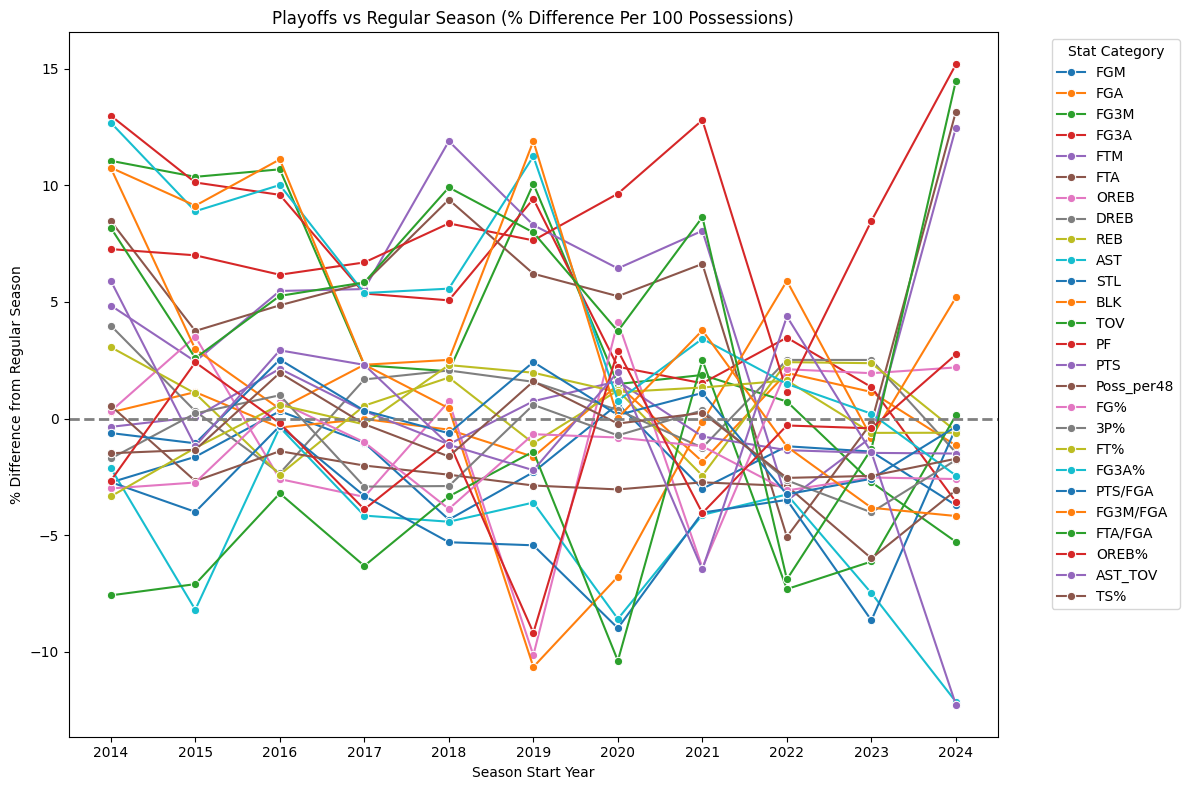

In [ ]:
plt.figure(figsize=(12,8))
for col in comparison_df.columns:
    if col != 'Season_start_year':
        sns.lineplot(
            x=comparison_df['Season_start_year'],
            y=comparison_df[col],
            marker='o',
            label=col
        )

plt.title("Playoffs vs Regular Season (% Difference Per 100 Possessions)")
plt.xlabel("Season Start Year")
plt.ylabel("% Difference from Regular Season")
plt.xticks(ticks=range(2014, 2025))
plt.axhline(0, color='gray', linestyle='--', linewidth=2)  # baseline reference
plt.legend(title='Stat Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

def create_league_trends_figure(data):
    # Aggregate data by season (regular season totals)
    df = data[data['Season_Type'] == 'Regular Season'].copy()
    df['Season_start_year'] = df['Year'].str[:4].astype(int)
    league = df.groupby('Season_start_year').agg({
        'PTS': 'sum', 'FGA': 'sum', 'FG3A': 'sum', 'FTA': 'sum', 'TOV': 'sum', 'OREB': 'sum', 'MIN': 'sum'
    }).reset_index()
    # Compute league-wide metrics per season
    league['PPG'] = (league['PTS'] / (league['MIN'] / (48*5)))  # points per team-game
    league['3PA_rate'] = league['FG3A'] / league['FGA']
    league['TS%'] = league['PTS'] / (2 * (league['FGA'] + 0.44 * league['FTA']))
    # Estimate possessions per team-game for Pace
    league['Possessions'] = league['FGA'] + 0.44*league['FTA'] + league['TOV'] - league['OREB']
    league['Pace'] = league['Possessions'] / (league['MIN'] / (48*5))
    years = league['Season_start_year']
    stats = {
        "PPG": league['PPG'],
        "3PA Rate": league['3PA_rate'],
        "TS%": league['TS%'],
        "Pace": league['Pace']
    }
    # Create figure with one trace per stat (only one visible at a time)
    fig = go.Figure()
    for stat_name, values in stats.items():
        fig.add_trace(go.Scatter(
            x=years, y=values, mode='lines+markers', name=stat_name,
            visible=True if stat_name == "PPG" else False  # show PPG by default
        ))
    # Define dropdown menu to update visible traces
    buttons = []
    for i, stat_name in enumerate(stats.keys()):
        # Create a visibility mask for each trace (True for selected stat index)
        visibility = [False]*len(stats)
        visibility[i] = True
        buttons.append(dict(
            label=stat_name,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{stat_name} Over Seasons", "yaxis": {"title": stat_name}}]
        ))
    fig.update_layout(
        title="PPG Over Seasons",  # initial title (default stat PPG)
        xaxis_title="Season Start Year",
        yaxis_title="Value",
        updatemenus=[{
            "buttons": buttons,
            "direction": "down",
            "x": 0.0, "y": 1.15,  # position the dropdown above the plot
            "showactive": True
        }]
    )
    return fig

# Create and show the interactive figure
fig_league = create_league_trends_figure(data)
fig_league.show()


In [ ]:
def create_player_trend_figure(data, players):
    """Create an interactive line chart of PPG over time for the given list of players."""
    df = data[data['Season_Type'] == 'Regular Season'].copy()
    df['Season_start_year'] = df['Year'].str[:4].astype(int)
    df['PPG'] = df['PTS'] / df['GP']
    fig = go.Figure()
    for player in players:
        player_df = df[df['PLAYER'] == player]
        # Points per game by season for this player
        x = player_df['Season_start_year']
        y = player_df['PPG']
        fig.add_trace(go.Scatter(
            x=x, y=y, mode='lines+markers', name=player,
            visible=True if player == players[0] else False  # show first player by default
        ))
    # Create dropdown buttons for each player
    buttons = []
    n_players = len(players)
    for j, player in enumerate(players):
        vis = [False]*n_players
        vis[j] = True
        buttons.append(dict(
            label=player,
            method="update",
            args=[{"visible": vis},
                  {"title": f"{player} PPG Over Seasons", "yaxis": {"title": "PPG"}}]
        ))
    fig.update_layout(
        title=f"{players[0]} PPG Over Seasons",
        xaxis_title="Season Start Year", yaxis_title="PPG",
        updatemenus=[{
            "buttons": buttons, "direction": "down",
            "x": 0.0, "y": 1.15, "showactive": True
        }]
    )
    return fig

# Example: create a player dashboard for five star players
star_players = ["LeBron James", "Stephen Curry", "Kevin Durant", "James Harden", "Giannis Antetokounmpo"]
fig_players = create_player_trend_figure(data, star_players)
fig_players.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def prepare_next_season_ppg(data):
    df = data[data['Season_Type'] == 'Regular Season'].copy()
    # Compute per-game stats for the current season
    df['PPG'] = df['PTS'] / df['GP']
    df['APG'] = df['AST'] / df['GP']
    df['RPG'] = df['REB'] / df['GP']
    # Extract season start year as an integer (e.g., "2014-15" -> 2014)
    df['Season_start_year'] = df['Year'].str[:4].astype(int)
    # Sort by player and season to align next season data
    df.sort_values(['PLAYER', 'Season_start_year'], inplace=True)
    # Shift each player's PPG to the previous row to get next-season PPG
    df['Next_PPG'] = df.groupby('PLAYER')['PPG'].shift(-1)
    # Drop the last season of each player (no next season data)
    df_model = df.dropna(subset=['Next_PPG'])
    # Features and target
    X = df_model[['PPG', 'APG', 'RPG']]
    y = df_model['Next_PPG']
    return X, y

def train_and_evaluate_ppg_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Linear Regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_lin = linreg.predict(X_test)
    print("LinearRegression R^2 (train): {:.3f}".format(linreg.score(X_train, y_train)))
    print("LinearRegression R^2 (test): {:.3f}".format(linreg.score(X_test, y_test)))
    print("LinearRegression Coefficients:", dict(zip(X.columns, linreg.coef_)))
    # Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("RandomForestRegressor R^2 (test): {:.3f}".format(rf.score(X_test, y_test)))
    # Feature importances from Random Forest
    importances = dict(zip(X.columns, rf.feature_importances_))
    print("RandomForest Feature Importances:", importances)

# Prepare data and train models
X, y = prepare_next_season_ppg(data)
train_and_evaluate_ppg_model(X, y)


LinearRegression R^2 (train): 0.751
LinearRegression R^2 (test): 0.750
LinearRegression Coefficients: {'PPG': np.float64(0.9146149274071939), 'APG': np.float64(-0.0010533917645152296), 'RPG': np.float64(-0.06728427042633507)}
RandomForestRegressor R^2 (test): 0.731
RandomForest Feature Importances: {'PPG': np.float64(0.8431925806546275), 'APG': np.float64(0.07897484570929612), 'RPG': np.float64(0.07783257363607632)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def prepare_mvp_dataset(data):
    """Prepare features (PPG, APG, RPG) and target for MVP prediction (next-season MVP)."""
    df = data[data['Season_Type'] == 'Regular Season'].copy()
    df['PPG'] = df['PTS'] / df['GP']
    df['APG'] = df['AST'] / df['GP']
    df['RPG'] = df['REB'] / df['GP']
    df['Season_start_year'] = df['Year'].str[:4].astype(int)
    # Label MVP winners for each season (next season's MVP award)
    mvp_awards = {
        2014: "Stephen Curry", 2015: "Stephen Curry", 2016: "Russell Westbrook",
        2017: "James Harden", 2018: "Giannis Antetokounmpo", 2019: "Giannis Antetokounmpo",
        2020: "Nikola Jokic", 2021: "Nikola Jokic", 2022: "Joel Embiid"
    }
    df['MVP_next'] = 0
    for year, mvp_name in mvp_awards.items():
        df.loc[(df['Season_start_year'] == year) & (df['PLAYER'] == mvp_name), 'MVP_next'] = 1
    # Use data up to 2022 (so that 2023 is last MVP labeled)
    df_model = df[df['Season_start_year'] <= 2022].copy()
    X = df_model[['PPG', 'APG', 'RPG']]
    y = df_model['MVP_next']
    return X, y

def train_and_evaluate_mvp_model(X, y):
    """Train a Random Forest classifier to predict MVP and evaluate performance."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy (train): {:.3f}".format(clf.score(X_train, y_train)))
    print("Accuracy (test): {:.3f}".format(clf.score(X_test, y_test)))
    # Display detailed precision/recall (useful due to class imbalance)
    print(classification_report(y_test, y_pred, digits=3))
    # Feature importance indicates which stats are most relevant for MVP
    importances = dict(zip(X.columns, clf.feature_importances_))
    print("Feature Importances:", importances)

# Prepare data and train the MVP classifier
X_mvp, y_mvp = prepare_mvp_dataset(data)
train_and_evaluate_mvp_model(X_mvp, y_mvp)


Accuracy (train): 1.000
Accuracy (test): 0.998
              precision    recall  f1-score   support

           0      0.998     1.000     0.999      1183
           1      0.000     0.000     0.000         2

    accuracy                          0.998      1185
   macro avg      0.499     0.500     0.500      1185
weighted avg      0.997     0.998     0.997      1185

Feature Importances: {'PPG': np.float64(0.40464189167865877), 'APG': np.float64(0.4091535937169404), 'RPG': np.float64(0.18620451460440096)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/tmp/ipython-input-26-2799242195.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



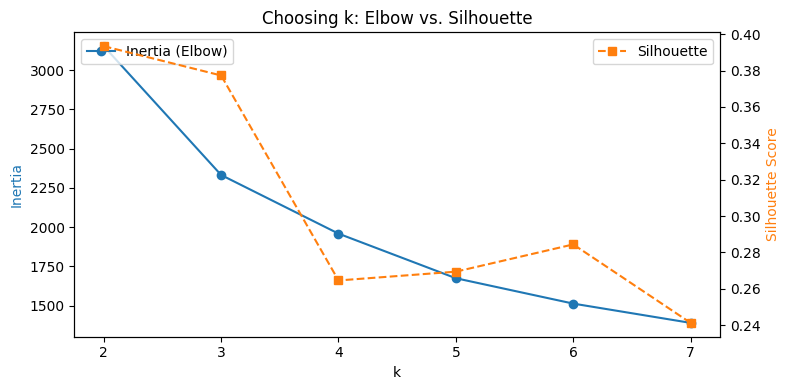

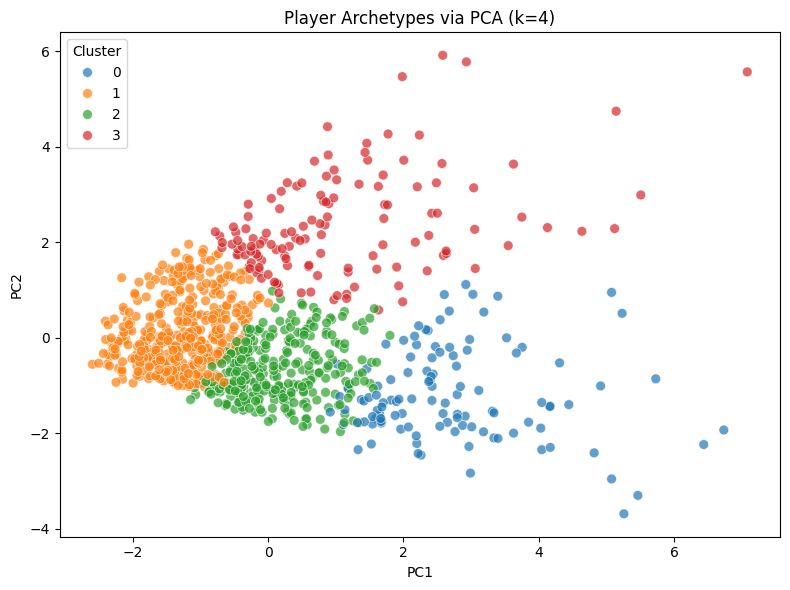

Cluster Centroids (per-game stats):
               PPG       APG       RPG       BPG    3PA_pg
Cluster                                                   
0        17.628837  4.863148  4.690607  0.394885  5.075573
1         4.973355  1.038776  2.711782  0.299205  1.421037
2         9.336608  2.133581  3.153585  0.283732  3.672304
3        10.791050  1.622135  6.985237  1.068882  1.262801

Cluster 0 example players: Lou Williams, Ben Simmons, Franz Wagner, Keyonte George, Bub Carrington

Cluster 1 example players: Orlando Robinson, Matisse Thybulle, Kirk Hinrich, Shaquille Harrison, Chris Andersen

Cluster 2 example players: Mirza Teletovic, Thaddeus Young, Josh Jackson, Allonzo Trier, Raymond Felton

Cluster 3 example players: Jabari Smith Jr., Larry Nance Jr., Brook Lopez, Day'Ron Sharpe, Karl-Anthony Towns


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load your regular‐season data (assuming it's in rs_df from earlier)
#    Ensure rs_df has columns: PLAYER, Year (string "2014-15"), GP, PTS, AST, REB, BLK, FG3A
# rs_df = pd.read_excel("nba_player_data.xlsx")
# rs_df = rs_df[rs_df["Season_Type"] == "Regular Season"].copy()

# 2. Compute per-game averages, filter by sample size
def prepare_player_stats(df, min_games=50):
    df["SeasonYear"] = df["Year"].str[:4].astype(int)
    agg = (
        df.groupby("PLAYER")
          .agg({"GP":"sum","PTS":"sum","AST":"sum","REB":"sum","BLK":"sum","FG3A":"sum"})
          .rename(columns={"GP":"Games","PTS":"TotalPTS","AST":"TotalAST",
                           "REB":"TotalREB","BLK":"TotalBLK","FG3A":"Total3PA"})
          .reset_index()
    )
    # filter out players with very few games
    agg = agg[agg["Games"] >= min_games].copy()
    # per-game stats
    agg["PPG"]    = agg["TotalPTS"]  / agg["Games"]
    agg["APG"]    = agg["TotalAST"]  / agg["Games"]
    agg["RPG"]    = agg["TotalREB"]  / agg["Games"]
    agg["BPG"]    = agg["TotalBLK"]  / agg["Games"]
    agg["3PA_pg"] = agg["Total3PA"]  / agg["Games"]
    return agg

player_stats = prepare_player_stats(rs_df, min_games=60)

# 3. Feature scaling
features = ["PPG","APG","RPG","BPG","3PA_pg"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(player_stats[features])

# 4. Find optimal k: elbow & silhouette
ks = range(2, 8)
inertia = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(ks, inertia, 'o-', label="Inertia (Elbow)")
ax1.set_xlabel("k")
ax1.set_ylabel("Inertia", color="C0")
ax2 = ax1.twinx()
ax2.plot(ks, sil_scores, 's--', color="C1", label="Silhouette")
ax2.set_ylabel("Silhouette Score", color="C1")
plt.title("Choosing k: Elbow vs. Silhouette")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

# From the plot, pick k where inertia elbow + high silhouette (often k=4)

# 5. Final KMeans with k=4
k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
player_stats["Cluster"] = kmeans.fit_predict(X_scaled)

# 6. PCA to visualize
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)
player_stats["PC1"], player_stats["PC2"] = coords[:,0], coords[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=player_stats, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=50, alpha=0.7)
plt.title("Player Archetypes via PCA (k=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# 7. Interpret clusters: centroids & example players
centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)
centroids_unscaled["Cluster"] = range(k_final)
print("Cluster Centroids (per-game stats):")
print(centroids_unscaled.set_index("Cluster"))

# Show a few example players in each cluster
for c in range(k_final):
    names = player_stats[player_stats["Cluster"]==c]["PLAYER"].sample(5, random_state=42).values
    print(f"\nCluster {c} example players:", ", ".join(names))
